In [1]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import pandas as pd

In [2]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

# Original Series

In [3]:
ts = pd.read_csv('original_series.csv')
ts.index = np.arange(1,len(ts)+1)

Text(0, 0.5, 'Views')

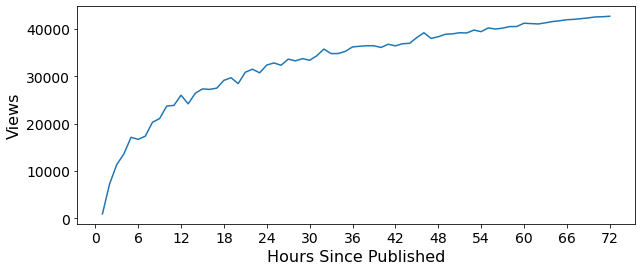

In [4]:
plt.figure(figsize=(10,4))
plt.plot(ts)

plt.xticks(np.arange(0,78,6), fontsize=14)
plt.xlabel('Hours Since Published', fontsize=16)

plt.yticks(np.arange(0,50000,10000), fontsize=14)
plt.ylabel('Views', fontsize=16)

# Original Series: $v_t$

# (1) Normalize ($v_t \rightarrow n_t$): $n_t = \frac{v_t - \mu}{\sigma}$

# (2) Exponentiate ($n_t \rightarrow e_t$): $e_t = e^{n_t}$

# (3) First Difference ($e_t \rightarrow d_t$): $d_t = e_t - e_{t-1}$

# $d_t = e^{\frac{v_t - \mu}{\sigma}} - e^{\frac{v_{t-1} - \mu}{\sigma}}$

# ------------------------------------------------------------

# (1) Normalize

In [5]:
mu = np.mean(ts).iloc[0]
sigma = np.std(ts).iloc[0]

norm_ts = (ts - mu) / sigma

/root/miniconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


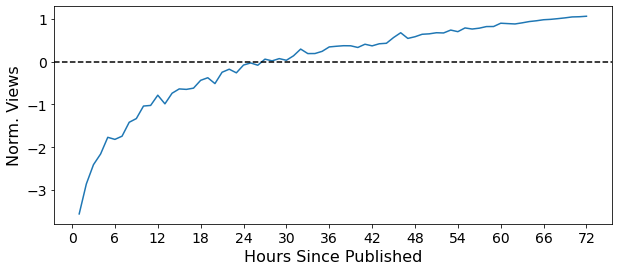

In [6]:
plt.figure(figsize=(10,4))
plt.plot(norm_ts)

plt.xticks(np.arange(0,78,6), fontsize=14)
plt.xlabel('Hours Since Published', fontsize=16)

plt.yticks(np.arange(-3,2), fontsize=14)
plt.ylabel('Norm. Views', fontsize=16)

plt.axhline(0, color='k', linestyle='--')

# (2) Exponentiate

In [7]:
exp_ts = np.exp(norm_ts)

Text(0, 0.5, 'Exp. Norm. Views')

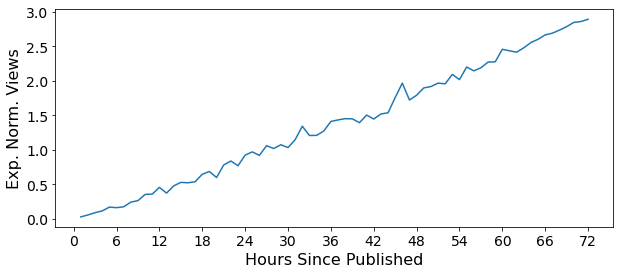

In [8]:
plt.figure(figsize=(10,4))
plt.plot(exp_ts)

plt.xticks(np.arange(0,78,6), fontsize=14)
plt.xlabel('Hours Since Published', fontsize=16)

plt.yticks(np.arange(0,3.5,.5), fontsize=14)
plt.ylabel('Exp. Norm. Views', fontsize=16)

In [9]:
perform_adf_test(exp_ts)

ADF Statistic: 1.648979
p-value: 0.997997


如果ADF统计量的值大于置信区间上限，同时p-value大于显著性水平，则不能拒绝原假设，认为时间序列是非平稳的。

ADF检验的p-value是0.997997，大于通常的置信水平（例如0.05），这意味着我们不能拒绝原假设，即时间序列具有单位根，即不是稳定的。因此，该时间序列需要进行差分或其他变换来消除非平稳性。

1.非平稳和平稳是时间序列的固有属性，季节性和残差这些分解和这两个特性无关是吗
- 季节性和残差是时间序列分解过程中得到的结果，与时间序列的平稳性和非平稳性没有直接关系。
2.时间序列分解中平稳性承担什么角色
- 在时间序列分解中，平稳性是非常重要的，因为平稳性意味着时间序列的均值和方差不随时间变化而变化，这使得我们能够更容易地分析和建模时间序列的特征。通过分解出季节性、趋势和残差等组成部分，并对每个部分分别进行建模，我们可以更好地理解时间序列的动态特征并预测未来值。同时，平稳性还有助于我们使用一些时间序列分析方法，如自回归移动平均模型（ARMA）和自回归积分移动平均模型（ARIMA），这些方法是基于平稳时间序列的假设来设计的。

3.对于一个随机时间序列的分析，通常的步骤如下：

- 检查序列的平稳性，如果序列不是平稳的，需要进行平稳化处理。

- 对于平稳的序列，可以进行时间序列分解，将序列分解成趋势、季节性和残差三个部分。

- 对于残差序列，可以检查其是否具有自相关性和部分自相关性，以确定其是否是一个随机游走模型或自回归模型等特定模型的噪声项。

- 根据模型诊断的结果选择合适的时间序列模型，进行参数估计和模型预测。

- 对模型预测的结果进行评估和验证，如果需要可以进行调整和优化。
4.在时间序列中，具有平稳性的序列通常具有以下特性：

- 均值稳定不变：序列的均值不随时间变化而变化。

- 方差稳定不变：序列的方差不随时间变化而变化。

- 自协方差稳定不变：序列的自协方差不随时间变化而变化。

一些具有平稳性的时间序列包括：

- 白噪声序列：均值为0，方差为常数，且在不同时间点的取值彼此独立的序列。

- 随机游走序列：一种特殊的非平稳序列，具有无限制的漂移（trend），但没有季节性。

- 平稳ARMA模型：一个平稳的自回归滑动平均模型，其中自回归和移动平均部分的系数是固定的。

# (3) First Difference

In [10]:
diff_ts = exp_ts.diff().dropna()

Text(0, 0.5, 'First Diff. \nExp. Norm. Views')

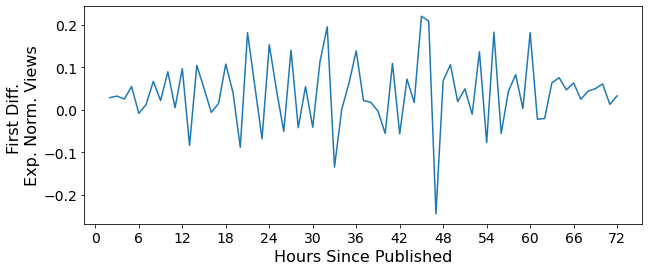

In [11]:
plt.figure(figsize=(10,4))
plt.plot(diff_ts)

plt.xticks(np.arange(0,78,6), fontsize=14)
plt.xlabel('Hours Since Published', fontsize=16)

plt.yticks(np.arange(-0.2,0.3,.1), fontsize=14)
plt.ylabel('First Diff. \nExp. Norm. Views', fontsize=16)

In [12]:
perform_adf_test(diff_ts)

ADF Statistic: -4.881064
p-value: 0.000038


# Fit AR Model

/root/miniconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


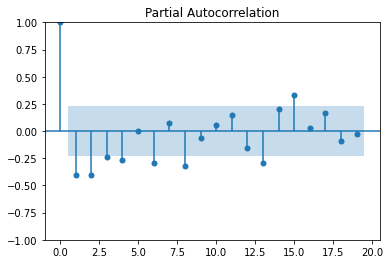

In [13]:
plot_pacf(diff_ts)
plt.show()

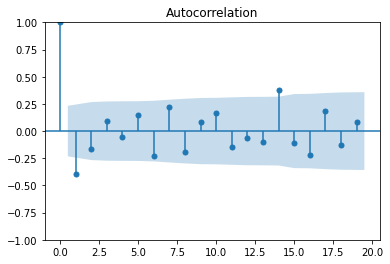

In [14]:
plot_acf(diff_ts)
plt.show()

In [21]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [22]:
#create the model
model = ARIMA(diff_ts, order=(4,1,1))

In [23]:
model_fit = model.fit()

# Predict Out 3 Hours

In [25]:
prediction_info = model_fit.forecast(3)

predictions = prediction_info[1]
lower_bound = prediction_info[2][:,1]
upper_bound = prediction_info[2][:,2]

KeyError: 1

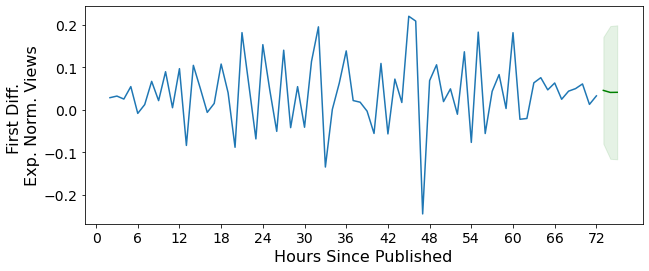

In [26]:
plt.figure(figsize=(10,4))
plt.plot(diff_ts)

plt.xticks(np.arange(0,78,6), fontsize=14)
plt.xlabel('Hours Since Published', fontsize=16)

plt.yticks(np.arange(-0.2,0.3,.1), fontsize=14)
plt.ylabel('First Diff. \nExp. Norm. Views', fontsize=16)

plt.plot(np.arange(len(ts)+1, len(ts)+4), predictions, color='g')
plt.fill_between(np.arange(len(ts)+1, len(ts)+4), lower_bound, upper_bound, color='g', alpha=0.1)

# Undo Transformations: ($\hat{d}_{t+1} \rightarrow \hat{v}_{t+1}$)

# $\hat{v}_{t+1} = \sigma \ln(\hat{d}_{t+1} + e^{\frac{v_t - \mu}{\sigma}}) + \mu$

In [27]:
def undo_transformations(predictions, series, mu, sigma):
    first_pred = sigma*np.log(predictions[0] + np.exp((series.iloc[-1]-mu)/sigma)) + mu
    orig_predictions = [first_pred]
    
    for i in range(len(predictions[1:])):
        next_pred = sigma*np.log(predictions[i+1] + np.exp((orig_predictions[-1]-mu)/sigma)) + mu
        orig_predictions.append(next_pred)
    
    return np.array(orig_predictions).flatten()

In [28]:
orig_preds = undo_transformations(predictions, ts, mu, sigma)
orig_lower_bound = undo_transformations(lower_bound, ts, mu, sigma)
orig_upper_bound = undo_transformations(upper_bound, ts, mu, sigma)

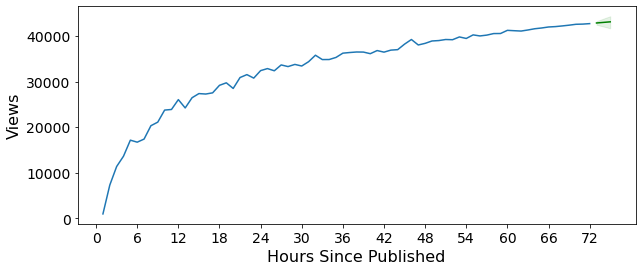

In [29]:
plt.figure(figsize=(10,4))
plt.plot(ts)

plt.xticks(np.arange(0,78,6), fontsize=14)
plt.xlabel('Hours Since Published', fontsize=16)

plt.yticks(np.arange(0,50000,10000), fontsize=14)
plt.ylabel('Views', fontsize=16)

plt.plot(np.arange(len(ts)+1, len(ts)+4), orig_preds, color='g')
plt.fill_between(np.arange(len(ts)+1, len(ts)+4), orig_lower_bound, orig_upper_bound, color='g', alpha=0.1)

(40000.0, 45000.0)

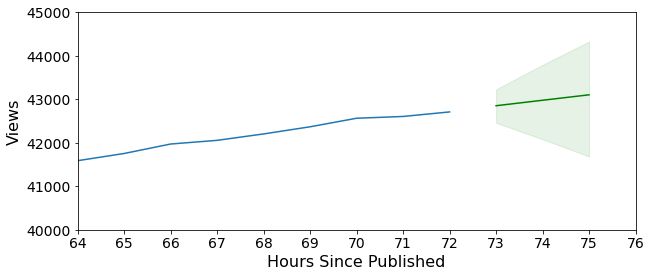

In [30]:
plt.figure(figsize=(10,4))
plt.plot(ts)

plt.xticks(np.arange(0,78), fontsize=14)
plt.xlabel('Hours Since Published', fontsize=16)

plt.yticks(np.arange(40000,46000,1000), fontsize=14)
plt.ylabel('Views', fontsize=16)

plt.plot(np.arange(len(ts)+1, len(ts)+4), orig_preds, color='g')
plt.fill_between(np.arange(len(ts)+1, len(ts)+4), orig_lower_bound, orig_upper_bound, color='g', alpha=0.1)
plt.xlim(64,76)
plt.ylim(40000, 45000)